In [1]:
import pandas as pd
from sklearn.neural_network import MLPClassifier

In [2]:
import os

df_labels = pd.read_csv('data/innovaid_hackathon_anima/output_classes.csv')
df = pd.read_csv('data/innovaid_hackathon_anima/total_gaze_imgs.csv')[1:]

levels = {'None-Minimal': 0,
          'Mild': 0,
          'Moderate': 1,
          'Moderately Severe': 2,
          'Severe': 3}

X = []
y = []
for row in df.iterrows():
    r = row[1][1:].to_numpy()
    X.append(r)
    label = df_labels[df_labels['sid'] == row[1][0].split('.')[0]]['depression_severity'].item()
    label = levels[label]
    y.append(label)

/var/folders/j8/j546nj8j2dj0q405lvzdkn4m0000gn/T/ipykernel_94833/706752271.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = df_labels[df_labels['sid'] == row[1][0].split('.')[0]]['depression_severity'].item()


In [3]:
len(X), len(y)

(3101, 3101)

In [4]:
import numpy as np

def balance_dataset(X, y, m):
    unique_classes, class_counts = np.unique(y, return_counts=True)

    # Find the minimum count across all classes
    min_count = min(class_counts)

    # Initialize lists to store the trimmed data and labels
    X_trimmed = []
    y_trimmed = []

    for cls in unique_classes:
        # Indices of the current class
        indices = np.where(y == cls)[0]

        # Trim the indices to have exactly 'm' occurrences
        trimmed_indices = np.random.choice(indices, size=min(m, len(indices)), replace=False)

        # Append the trimmed data and labels
        X_trimmed.append(X[trimmed_indices])
        y_trimmed.append(y[trimmed_indices])

    # Concatenate the trimmed data and labels
    X_trimmed = np.concatenate(X_trimmed)
    y_trimmed = np.concatenate(y_trimmed)

    return X_trimmed, y_trimmed

In [5]:
X_bal, y_bal = balance_dataset(np.asarray(X), np.asarray(y), 500)

In [6]:
len(X_bal), len(y_bal)

(2000, 2000)

---
## Multi-class classification

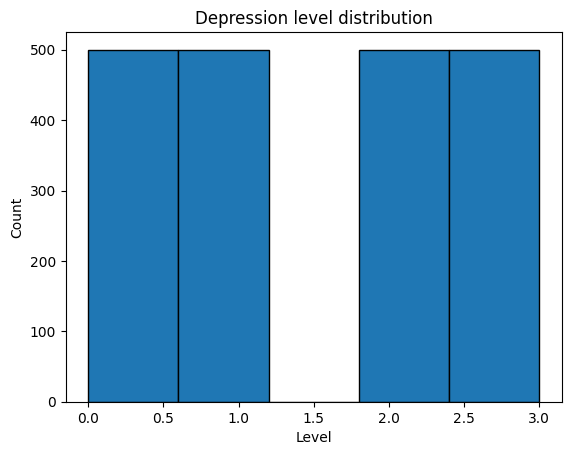

In [7]:
import matplotlib.pyplot as plt

plt.hist(y_bal, bins=5, ec='black')
plt.title('Depression level distribution')
plt.xlabel('Level')
plt.ylabel('Count')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)

In [9]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier



names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]


for name, clf in zip(names, classifiers):
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print(f'{name}: {round(score, 5)}')

Nearest Neighbors: 0.27
Linear SVM: 0.3075
RBF SVM: 0.225


/Users/alinka/Documents/innovaid/eye-tracking-for-depression/venv/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Gaussian Process: 0.2775
Decision Tree: 0.3125
Random Forest: 0.2375
Neural Net: 0.25
AdaBoost: 0.245
Naive Bayes: 0.26
QDA: 0.2825


/Users/alinka/Documents/innovaid/eye-tracking-for-depression/venv/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


---